In [1]:
import numpy as np
np.set_printoptions(suppress=True)
import matplotlib.pyplot as plt
%matplotlib inline
import pickle
plt.style.use('seaborn-white')

<ipython-input-1-6d0fa4db7acd>:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


In [2]:
import morl
from env_DeepSeaTreasure import DeepSeaTreasure

# convex = False
use_B = False

beta = 4.0

In [3]:
def main(n_rep: int):
    for i in range(1, 1 + n_rep):
        
        np.random.seed(i)
        
        policy = morl.make_policy_net(state_dim=2, 
                                      hidden_dim=36, 
                                      act_space=('discrete', 4), 
                                      c_dim=3, 
                                      seed=i,
                                      embed_dims=None).to(morl.DEVICE)
        
        out = morl.learn(policy=policy, 
                         gradient_steps=50, 
                         n_grad_repeat=1, 
                         group_size_train=400, 
                         group_size_test=400, 
                         env=DeepSeaTreasure(convex=False, noise_std=0.03, normalizer=lambda x: x / 4.0), 
                         n_obj=2, 
                         test_repeat=1, 
                         n_jobs=20, 
                         ep_len_train=50, 
                         ep_len_test=50, 
                         nn_k=10, 
                         beta=4.0, 
                         J_AU=np.array([0.0, -200.0]), 
                         J_U=np.array([0.0, -200.0]) + 1, 
                         gamma_train=1.0, 
                         gamma_test=1.0, 
                         mode='maxmin', 
                         score_clipped_above_zero=True,
                         use_QV=False, 
                         QV_params=None
                        )
        with open('out_DST_{}.pkl'.format(i), 'wb') as f:
            pickle.dump(out, f)

In [4]:
%%time
main(5)

0 [1.38e+04] 1 [9.411e+03] 2 [2.285e+04] 3 [2.286e+04] 4 [1.380e+04] 5 [2.286e+04] 6 [2.285e+04] 7 [2.286e+04] 8 [2.286e+04] 9 [2.286e+04] 10 [2.286e+04] 11 [2.285e+04] 12 [2.286e+04] 13 [2.285e+04] 14 [2.286e+04] 15 [2.286e+04] 16 [2.285e+04] 17 [2.286e+04] 18 [2.286e+04] 19 [2.286e+04] 20 [2.285e+04] 21 [2.285e+04] 22 [2.286e+04] 23 [2.286e+04] 24 [2.286e+04] 25 [2.286e+04] 26 [2.285e+04] 27 [2.286e+04] 28 [2.285e+04] 29 [2.285e+04] 30 [2.285e+04] 31 [2.286e+04] 32 [2.285e+04] 33 [2.285e+04] 34 [2.285e+04] 35 [2.285e+04] 36 [2.285e+04] 37 [2.285e+04] 38 [2.285e+04] 39 [2.285e+04] 40 [2.284e+04] 41 [2.285e+04] 42 [2.285e+04] 43 [2.285e+04] 44 [2.284e+04] 45 [2.284e+04] 46 [2.284e+04] 47 [2.285e+04] 48 [2.285e+04] 49 [2.285e+04] 50 [2.284e+04] 0 [396.0] 1 [591.0] 2 [591.0] 3 [1.369e+04] 4 [9.347e+03] 5 [1.363e+04] 6 [3.081e+03] 7 [9.405e+03] 8 [1.380e+04] 9 [2.278e+04] 10 [2.286e+04] 11 [2.286e+04] 12 [2.286e+04] 13 [2.286e+04] 14 [2.286e+04] 15 [2.285e+04] 16 [2.286e+04] 17 [2.285e+04

In [5]:
outs = []
for i in range(1, 6):
    with open('out_DST_{}.pkl'.format(i), 'rb') as f:
        outs += [pickle.load(f)]

In [6]:
[np.max(outs[i][0][:20]) for i in range(5)]

[22855.0, 22855.0, 22855.0, 22855.0, 22855.0]

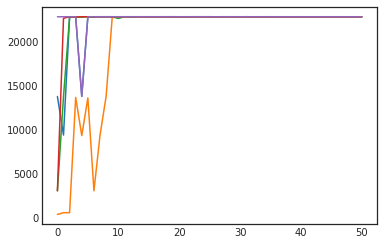

In [7]:
for i in range(5):
    plt.plot(outs[i][0])

In [8]:
_o = np.asarray([outs[i][0] for i in range(5)])

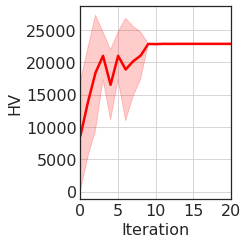

In [10]:
plt.figure(figsize=(3.55, 3.5))
plt.xlim(0, 20)
plt.xticks([0, 5, 10, 15, 20])
plt.tick_params(labelsize=16)
plt.grid()
plt.ylabel('HV', fontsize=16)
plt.xlabel('Iteration', fontsize=16)
plt.plot(_o.mean(axis=0), c='r', lw=2.5)
plt.fill_between(np.arange(51), 
                 _o.mean(axis=0) - _o.std(axis=0), 
                 _o.mean(axis=0) + _o.std(axis=0), alpha=0.2, color='r')
plt.tight_layout()
# plt.savefig('learning_dst_convex.png', dpi=400)

beta = 0.0

In [12]:
def main(n_rep: int):
    for i in range(1, 1 + n_rep):
        
        np.random.seed(i)
        
        policy = morl.make_policy_net(state_dim=2, 
                                      hidden_dim=36, 
                                      act_space=('discrete', 4), 
                                      c_dim=3, 
                                      seed=i,
                                      embed_dims=None).to(morl.DEVICE)
        
        out = morl.learn(policy=policy, 
                         gradient_steps=50, 
                         n_grad_repeat=1, 
                         group_size_train=400, 
                         group_size_test=400, 
                         env=DeepSeaTreasure(convex=False, noise_std=0.03, normalizer=lambda x: x / 4.0), 
                         n_obj=2, 
                         test_repeat=1, 
                         n_jobs=20, 
                         ep_len_train=50, 
                         ep_len_test=50, 
                         nn_k=10, 
                         beta=0.0, 
                         J_AU=np.array([0.0, -200.0]), 
                         J_U=np.array([0.0, -200.0]) + 1, 
                         gamma_train=1.0, 
                         gamma_test=1.0, 
                         mode='maxmin', 
                         score_clipped_above_zero=True,
                         use_QV=False, 
                         QV_params=None
                        )
        with open('out_DST_beta=0_{}.pkl'.format(i), 'wb') as f:
            pickle.dump(out, f)

In [13]:
%%time
main(5)

0 [2.274e+04] 1 [2.284e+04] 2 [1.38e+04] 3 [2.28e+04] 4 [1.37e+04] 5 [1.38e+04] 6 [9.381e+03] 7 [977.0] 8 [2.28e+04] 9 [1.369e+04] 10 [3.078e+03] 11 [1.369e+04] 12 [1.369e+04] 13 [977.0] 14 [1.551e+03] 15 [591.0] 16 [1.356e+04] 17 [2.254e+04] 18 [3.07e+03] 19 [977.0] 20 [1.357e+04] 21 [591.0] 22 [977.0] 23 [396.0] 24 [4.51e+03] 25 [199.0] 26 [975.0] 27 [199.0] 28 [396.0] 29 [591.0] 30 [591.0] 31 [396.0] 32 [396.0] 33 [971.0] 34 [377.0] 35 [591.0] 36 [591.0] 37 [396.0] 38 [199.0] 39 [199.0] 40 [591.0] 41 [396.0] 42 [971.0] 43 [396.0] 44 [591.0] 45 [589.0] 46 [396.0] 47 [396.0] 48 [199.0] 49 [591.0] 50 [396.0] 0 [396.0] 1 [199.0] 2 [396.0] 3 [199.0] 4 [199.0] 5 [589.0] 6 [199.0] 7 [199.0] 8 [199.0] 9 [199.0] 10 [199.0] 11 [199.0] 12 [199.0] 13 [199.0] 14 [199.0] 15 [199.0] 16 [199.0] 17 [199.0] 18 [199.0] 19 [199.0] 20 [199.0] 21 [199.0] 22 [199.0] 23 [199.0] 24 [199.0] 25 [199.0] 26 [199.0] 27 [199.0] 28 [199.0] 29 [199.0] 30 [199.0] 31 [199.0] 32 [199.0] 33 [199.0] 34 [199.0] 35 [199.0

In [14]:
outs_0 = []
for i in range(1, 6):
    with open('out_DST_beta=0_{}.pkl'.format(i), 'rb') as f:
        outs_0 += [pickle.load(f)]

In [15]:
[np.max(outs_0[i][0][:20]) for i in range(5)]

[22844.0, 589.0, 22799.0, 22847.0, 22855.0]

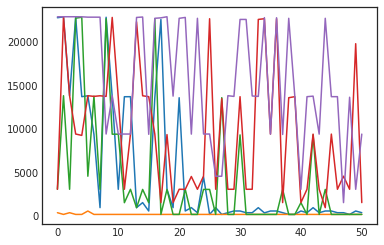

In [17]:
for i in range(5):
    plt.plot(outs_0[i][0])

In [18]:
_o0 = np.asarray([outs_0[i][0] for i in range(5)])

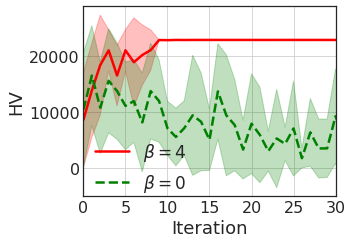

In [33]:
plt.figure(figsize=(5, 3.5))
plt.xlim(0, 30)
plt.xticks(np.arange(0, 31, 5))
plt.tick_params(labelsize=16)
plt.grid()
plt.ylabel('HV', fontsize=18)
plt.xlabel('Iteration', fontsize=18)

plt.plot(_o.mean(axis=0), c='r', lw=2.5, label=r'$\beta=4$')
plt.fill_between(np.arange(51), 
                 _o.mean(axis=0) - _o.std(axis=0), 
                 _o.mean(axis=0) + _o.std(axis=0), alpha=0.25, color='r')

plt.plot(_o0.mean(axis=0), c='g', lw=2.5, ls='--', label=r'$\beta=0$')
plt.fill_between(np.arange(51), 
                 _o0.mean(axis=0) - _o0.std(axis=0), 
                 _o0.mean(axis=0) + _o0.std(axis=0), alpha=0.25, color='g')

plt.tight_layout()
plt.legend(fontsize=17, bbox_to_anchor=(0.47, 0.37))
# plt.savefig('learning_dst_original.png', dpi=400)